<a href="https://colab.research.google.com/github/alexvanhalen/Burn-Baby-Burn/blob/master/QFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install qiskit


[0.+0.j    0.+0.707j 0.+0.j    0.+0.707j]
[0.    0.707 0.    0.707]


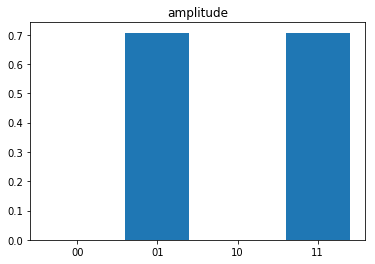

[ 0.     49.9849  0.     49.9849]


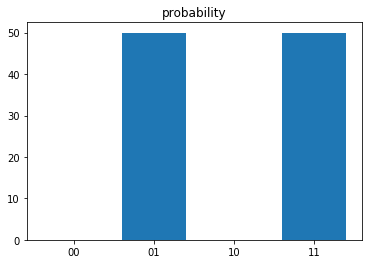

OrderedDict([('h', 3), ('measure', 2), ('u1', 1), ('cu1', 1)])
         ┌───┐┌─────────┐┌───┐       ┌─┐        
q1_0: |0>┤ H ├┤ U1(-pi) ├┤ H ├─■─────┤M├────────
         └───┘└─────────┘└───┘ │pi/2 └╥┘┌───┐┌─┐
q1_1: |0>──────────────────────■──────╫─┤ H ├┤M├
                                      ║ └───┘└╥┘
 c1_0: 0 ═════════════════════════════╩═══════╬═
                                              ║ 
 c1_1: 0 ═════════════════════════════════════╩═
                                                
{'11': 53, '01': 47}


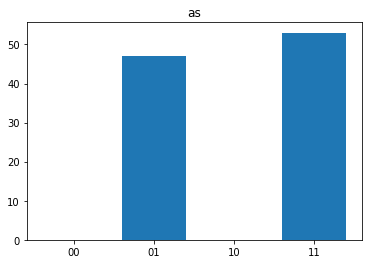

In [2]:
##....... QFT _ FFT ......##
## Author: 張歆侞         ##
import math
from qiskit import BasicAer ,IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
import matplotlib.pyplot as plt
import numpy as np

## .............QFT..................................##
n=2
qr = QuantumRegister(n)
cr = ClassicalRegister(n)
circuit = QuantumCircuit(qr, cr)
#輸入值
for i in range(0,1):
    k=0
    circuit.h(i)
    circuit.u1(-math.pi/2**(i-k),i)
#circuit.h(qr[2])

#QFT
for i in range(n):
    for k in range(i):
        circuit.cu1(math.pi/2**(i-k),i,k)
    circuit.h(i)

#print(circuit)
##........................................................




#amplitude
#STATEVECTOR
backend = BasicAer.get_backend("statevector_simulator")
simulate = execute(circuit, backend).result()
qc_state=simulate.get_statevector(circuit,decimals=3)
print(qc_state)
x=['00','01','10','11']
# x = ['000','001','010','100','011','101','110','111']
# x=['0000','0001','0010','0011','0100','0101','0110','0111','1000','1001','1010','1011','1100','1101','1110','1111']
# X=['00000','00001','00010','00011','00100','00101','00110','00111','01000','01001','01010','01011','01100','01101','01110','01111','10000','10001','10010','10011','10100','10101','10110','10111','11000','11001','11010','11011','11100','11101','11110','11111']

a=[]#amplitude
p=[]#probability
for i in range(1):
    prob=qc_state.real**2+qc_state.imag**2
    a.append(prob**0.5)
    p.append(prob*100)
print(a[0])#amplitude
plt.title('amplitude')
plt.bar(x,a[0])
plt.show()    
print(p[0])#probability
plt.title('probability')
plt.bar(x,p[0])
plt.show() 

#劃出alpha beta 實數虛數長條圖
# a=[]
# b=[]
# for i in range(1):
#     a.append(qc_state.real)
#     b.append(qc_state.imag)
# plt.bar(x,a[0],align="edge",width=0.35)
# plt.bar(x,b[0],align="edge",width=-0.35)
# plt.show()



#measure
for i in range(n):
    circuit.measure(i,i)
# a breakdown of operations by type
print(circuit.count_ops())
print(circuit)




#probabilities 分配
#MEASUREMENT probability
backend = BasicAer.get_backend("qasm_simulator")
simulate = execute([circuit], backend=backend, shots=100).result() # To execute a circuit for many shots and obtain a histogram of all measurement result# shots=1024, in total we tried 1024 times
dict_result =simulate.get_counts(circuit)
print(dict_result )
data=[]

#plot  histogram
x=['00','01','10','11']
# x = ['000','001','010','100','011','101','110','111']
# x=['0000','0001','0010','0011','0100','0101','0110','0111','1000','1001','1010','1011','1100','1101','1110','1111']
for i in range(len(x)):
    try:
        data.append(dict_result[x[i]])
    except:
        data.append(0)
plt.title('as')
plt.bar(x, data)
plt.show()







## .............QFT..................................##
# qr = QuantumRegister(n)
# cr = ClassicalRegister(n)
# circuit = QuantumCircuit(qr, cr)

# circuit.h(qr[0])
# circuit.u1(-math.pi/1.,qr[0])
# circuit.h(qr[1])
# circuit.u1(-math.pi/2.,qr[1])
# circuit.h(qr[2])
# circuit.u1(-math.pi/4.,qr[2])
# circuit.barrier()
# print(circuit)

# circuit.h(qr[0])
# circuit.cu1(math.pi/2.,qr[0],qr[1])
# circuit.cu1(math.pi/4.,qr[0],qr[2])

# circuit.h(qr[1])
# circuit.cu1(math.pi/2.,qr[1],qr[2])

# circuit.h(qr[2])
# circuit.barrier()
# ##.......................................................